# 📊 Marketing Mix Modeling

Este notebook contiene un análisis de Marketing Mix Model (MMM) utilizando un dataset real de Kaggle con información de inversión publicitaria y ventas semanales.

**Objetivos:**
- Estimar el impacto de diferentes canales publicitarios en las ventas
- Calcular el ROAS (Return on Advertising Spend) por canal
- Visualizar e interpretar los resultados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Configuración de gráficos
plt.style.use('ggplot')
sns.set(font_scale=1.1)

In [ ]:
file_path = 'mediamix_sales.csv'

# Carga del dataset
df = pd.read_csv(file_path)
df.head()

,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
0,1/1/01,119.652,66.729,43.719,37.8,55.36,13.84,35,41.8782,5,33.50256,26.802048,5,22100
1,1/2/01,23.140,12.905,8.455,39.3,36.08,9.02,35,8.0990,5,6.47920,5.183360,6,10400
2,1/3/01,8.944,4.988,3.268,45.9,55.44,13.86,35,3.1304,5,2.50432,2.003456,7,9300
3,1/4/01,78.780,43.935,28.785,41.3,46.80,11.70,35,27.5730,5,22.05840,17.646720,5,18500
4,1/5/01,94.016,52.432,34.352,10.8,46.72,11.68,35,32.9056,5,26.32448,21.059584,7,12900


In [5]:
df.columns

Index(['Time', 'tv_sponsorships', 'tv_cricket', 'tv_RON', 'radio', 'NPP',
       'Magazines', 'OOH', 'Social', 'Programmatic', 'Display_Rest', 'Search',
       'Native', 'sales'],
      dtype='object')

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

# Revisión general
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             200 non-null    datetime64[ns]
 1   tv_sponsorships  200 non-null    float64       
 2   tv_cricket       200 non-null    float64       
 3   tv_RON           200 non-null    float64       
 4   radio            200 non-null    float64       
 5   NPP              200 non-null    float64       
 6   Magazines        200 non-null    float64       
 7   OOH              200 non-null    int64         
 8   Social           200 non-null    float64       
 9   Programmatic     200 non-null    int64         
 10  Display_Rest     200 non-null    float64       
 11  Search           200 non-null    float64       
 12  Native           200 non-null    int64         
 13  sales            200 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(4)

/var/folders/nd/cgq1r3m51yl69nv64bn56p1c0000gn/T/ipykernel_6722/2677575338.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Time,tv_sponsorships,tv_cricket,tv_RON,radio,NPP,Magazines,OOH,Social,Programmatic,Display_Rest,Search,Native,sales
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2008-11-08 14:52:48,59.512390,41.657365,51.143055,23.264000,24.372700,4.543300,29.350000,21.925009,17.650000,18.090883,15.664170,5.060000,14022.500000
min,2001-01-01 00:00:00,0.700000,1.000000,0.000000,0.000000,0.270000,0.030000,15.000000,0.245000,5.000000,0.196000,0.156800,5.000000,1600.000000
25%,2005-01-02 18:00:00,14.017500,1.750000,14.935000,9.975000,10.000000,1.015000,18.750000,9.259250,20.000000,3.986500,5.925920,5.000000,10375.000000
50%,2009-01-04 12:00:00,44.705000,19.022000,31.330000,22.900000,18.800000,3.420000,30.000000,17.329375,20.000000,15.584800,14.106848,5.000000,12900.000000
75%,2013-01-06 06:00:00,92.777500,68.286500,67.262500,36.525000,36.080000,6.185000,40.000000,33.302500,20.000000,29.134560,23.966880,5.000000,17400.000000
max,2017-01-08 00:00:00,224.560000,207.480000,253.260000,49.600000,91.200000,22.800000,40.000000,78.596000,20.000000,62.876800,50.301440,9.000000,27000.000000
std,NaN,50.672105,49.165205,52.431041,14.846809,18.054915,4.187503,10.103858,17.342664,4.508785,14.692380,11.355416,0.408945,5217.456566


In [7]:
# Variables dependiente e independientes
y = df['sales']  # ajustar si la columna tiene otro nombre

# Seleccionar variables de marketing
X = df[['tv_sponsorships','tv_cricket','tv_RON','radio','NPP','Magazines','OOH','Social','Programmatic','Display_Rest','Search','Native']] 

# Agregar constante para statsmodels
X = sm.add_constant(X)

# Entrenar modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     144.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.16e-87
Time:                        20:53:34   Log-Likelihood:                -1762.4
No. Observations:                 200   AIC:                             3551.
Df Residuals:                     187   BIC:                             3594.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5531.8514   2104.035     

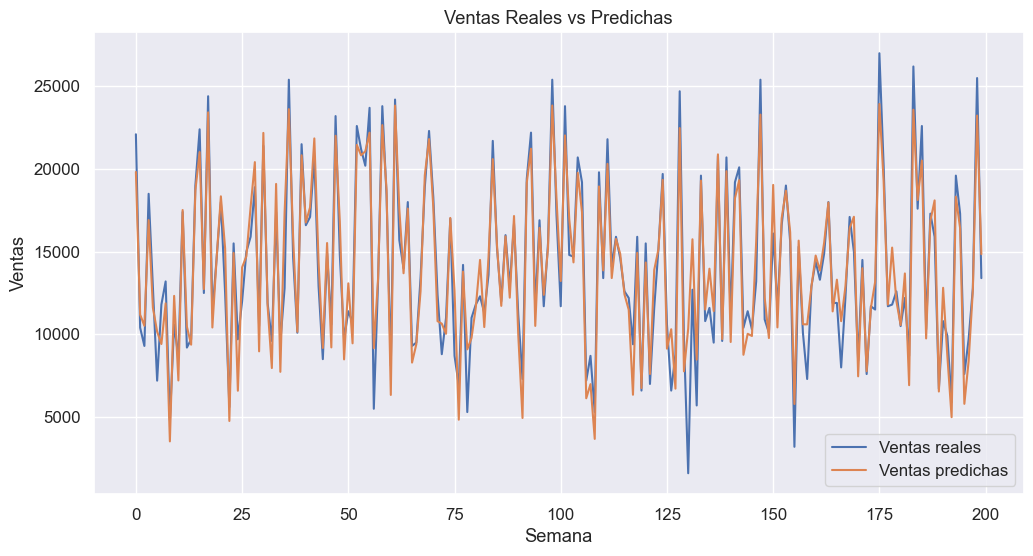

In [8]:
# Gráfico comparando ventas reales vs predichas
df['predicted_sales'] = modelo.predict(X)

plt.figure(figsize=(12,6))
plt.plot(df['sales'], label='Ventas reales')
plt.plot(df['predicted_sales'], label='Ventas predichas')
plt.title('Ventas Reales vs Predichas')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

           variable         VIF
0             const  313.703715
1   tv_sponsorships   16.615712
2        tv_cricket    1.146008
3            tv_RON    2.038767
4             radio    1.177687
5               NPP    4.715494
6         Magazines    5.045724
7               OOH    1.325059
8            Social   26.760850
9      Programmatic    1.979744
10     Display_Rest   10.319422
11           Search   11.840196
12           Native    1.377098


Solucionamos multicolinealidad

In [10]:
df['tv_total'] = df['tv_sponsorships'] + df['tv_cricket'] + df['tv_RON']
df['digital_total'] = df[['Social', 'Programmatic', 'Display_Rest', 'Search', 'Native']].sum(axis=1)

X = df[['tv_total', 'radio', 'NPP', 'Magazines', 'OOH', 'digital_total']]

In [11]:
# Agregar constante para statsmodels
X = sm.add_constant(X)

# Entrenar modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     256.3
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           4.39e-89
Time:                        20:58:16   Log-Likelihood:                -1775.9
No. Observations:                 200   AIC:                             3566.
Df Residuals:                     193   BIC:                             3589.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3282.8041    490.739      6.690

In [ ]:
media_inversion = df[['tv_total', 'radio', 'NPP', 'Magazines', 'OOH', 'digital_total']].mean()
roas = modelo.params[1:] / media_inversion
print(roas)

#Return on Advertising Spend
#ROAS = Ingresos generados por publicidad \ Inversión en publicidad

tv_total          0.258224
radio             8.129209
NPP               1.313761
Magazines       -41.642478
OOH              -0.655010
digital_total     0.161574
dtype: float64


Based on the OLS regression results, the model demonstrates strong explanatory power, with an adjusted R-squared of 0.885, indicating that 88.5% of the variation in sales is explained by the marketing variables. Among the predictors, tv_total, radio, and digital_total have a statistically significant and positive impact on sales, while Magazines shows a negative contribution. 

The ROAS analysis further supports these findings: radio stands out with the highest return (ROAS = 8.13), making it the most efficient channel, followed by NPP (1.31) and tv_total (0.26). In contrast, Magazines and OOH have negative ROAS values, suggesting ineffective or possibly wasteful spending. These insights provide a clear direction for reallocating budget toward more impactful media channels to maximize advertising efficiency.